In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('s2_s1_click.csv', delimiter=',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# プロット
plt.plot(train_x, train_y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

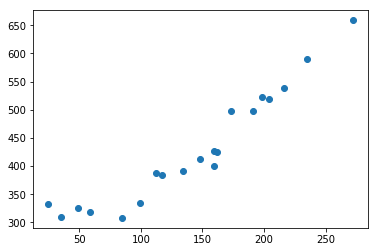

In [4]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 標準化
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)


plt.plot(train_x, train_y, 'o')
plt.show()

In [5]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す

error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    # パラメータを更新
    theta0 = tmp0
    theta1 = tmp1
    
    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # ログの出力
    count += 1
    log = '{}回目: theta = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))
   

1回目: theta = 9.369, theta1 = 2.323, 差分 = 76084.9109
2回目: theta = 17.765, theta1 = 4.146, 差分 = 73071.9484
3回目: theta = 25.993, theta1 = 5.933, 差分 = 70178.2993
4回目: theta = 34.056, theta1 = 7.684, 差分 = 67399.2386
5回目: theta = 41.958, theta1 = 9.399, 差分 = 64730.2288
6回目: theta = 49.702, theta1 = 11.081, 差分 = 62166.9117
7回目: theta = 57.291, theta1 = 12.729, 差分 = 59705.1020
8回目: theta = 64.728, theta1 = 14.344, 差分 = 57340.7800
9回目: theta = 72.016, theta1 = 15.927, 差分 = 55070.0851
10回目: theta = 79.159, theta1 = 17.478, 差分 = 52889.3097
11回目: theta = 86.159, theta1 = 18.998, 差分 = 50794.8931
12回目: theta = 93.019, theta1 = 20.487, 差分 = 48783.4153
13回目: theta = 99.741, theta1 = 21.947, 差分 = 46851.5920
14回目: theta = 106.329, theta1 = 23.378, 差分 = 44996.2690
15回目: theta = 112.786, theta1 = 24.780, 差分 = 43214.4168
16回目: theta = 119.113, theta1 = 26.154, 差分 = 41503.1258
17回目: theta = 125.314, theta1 = 27.500, 差分 = 39859.6021
18回目: theta = 131.391, theta1 = 28.820, 差分 = 38281.1618
19回目: theta = 137.34

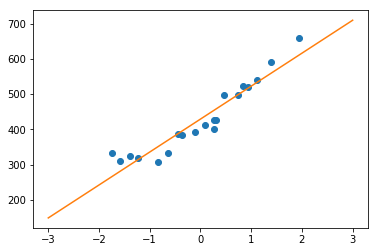

In [6]:
x = np.linspace(-3, 3, 100) 

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

20
100


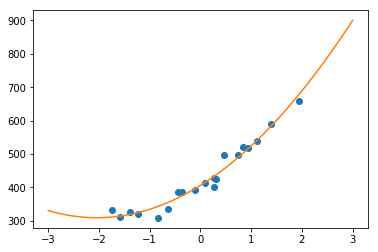

In [7]:
# 多項式回帰
# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    print(x.shape[0])
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)



# 予測関数

def f(x):
    return np.dot(x, theta)

# 誤差の差分
diff = 1

# 学習を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # パラメータを更新
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 旋回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    

x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

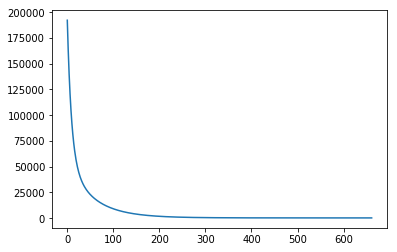

In [8]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# パラメータをランダムに初期化
theta = np.random.rand(3)

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
# 誤差をプロット
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

100


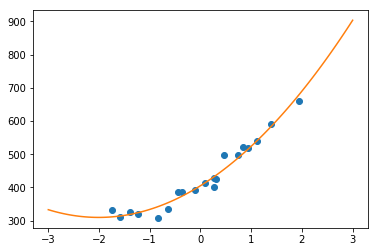

In [10]:
# 確率的勾配降下法
# パラメータをランダムに初期化

theta = np.random.rand(3)

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

errors.append(MSE(X, train_y))

while diff > 1e-2:
    p = np.random.permutation(X.shape[0])
    # 学習データをランダムに取り出して確率的勾配降下法でパラメータ更新
#     print('X-----------')
#     print(X)
#     print('X-----------')
#     print('p-----------')
#     print(p)
#     print('p-----------')
#     print('train_y',train_y)
#     print('train_y[p]',train_y[p])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 前回の誤差との差分を計算
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()